In [1]:
# HW8: created any plot you want using data of urban relevance
# I'm using NYC taxi data, specifically yellow cabs
# data here: http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml 

In [2]:
# data can be accessed via link below
# link: https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv

In [ ]:
import os
import sys
import pandas as pd
import geopandas as gpd
import pylab as pl
import scipy as sp
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
DEVELOPING=True 

In [68]:
# downloading data
!curl -O https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv $PUIDATA

In [69]:
# moving data to PUIDATA
!mv yellow_tripdata_2018-01.csv $PUIDATA

In [70]:
# checking that it was put in PUIDATA
!ls $PUIDATA

In [71]:
jan_cabs=pd.read_csv(os.getenv("PUIDATA") + '/' + 'yellow_tripdata_2018-01.csv')
jan_cabs.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [72]:
jan_cabs.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06,8.759874e+06
mean,1.560940e+00,1.606855e+00,2.804001e+00,1.039545e+00,1.644585e+02,1.627269e+02,1.310611e+00,1.224434e+01,3.246822e-01,4.975067e-01,1.818745e+00,3.026133e-01,2.996306e-01,1.549098e+01
std,4.962724e-01,1.258464e+00,6.412346e+01,4.450700e-01,6.636021e+01,7.031164e+01,4.817818e-01,1.168321e+01,4.502524e-01,4.333319e-02,2.486341e+00,1.738185e+00,1.442815e-02,1.419540e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03


In [73]:
# there are 8,750,000 observations, so I will cut the dataset down to every 1000th observation
if DEVELOPING == True:
    jan_cabs_trimmed=jan_cabs[::1000]
if DEVELOPING == False:
    jan_cabs=jan_cabs

In [74]:
# checking to make sure i trimmed the dataset correctly
jan_cabs_trimmed.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1000,1,2018-01-01 00:16:51,2018-01-01 00:26:47,1,1.3,1,N,114,90,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
2000,2,2018-01-01 00:22:20,2018-01-01 00:36:09,1,2.9,1,N,161,263,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30
3000,1,2018-01-01 00:57:07,2018-01-01 01:15:50,2,3.5,1,N,142,263,1,15.0,0.5,0.5,4.05,0.0,0.3,20.35
4000,1,2018-01-01 00:30:04,2018-01-01 00:40:11,1,1.2,1,N,158,186,1,8.0,0.5,0.5,2.00,0.0,0.3,11.30


In [75]:
jan_cabs_trimmed.shape

(8760, 17)

In [39]:
# renaming columns
jan_cabs_trimmed=jan_cabs_trimmed.rename(columns = {'tpep_dropoff_datetime' : 'dropoff_time'})
jan_cabs_trimmed=jan_cabs_trimmed.rename(columns = {'PULocationID' : 'pickup_zone'})
jan_cabs_trimmed=jan_cabs_trimmed.rename(columns = {'DOLocationID' : 'dropoff_zone'})
jan_cabs_trimmed.head()                                       

,VendorID,pickup time,dropoff_time,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,pickup_zone,dropoff_zone,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1000,1,2018-01-01 00:16:51,2018-01-01 00:26:47,1,1.3,1,N,114,90,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30
2000,2,2018-01-01 00:22:20,2018-01-01 00:36:09,1,2.9,1,N,161,263,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30
3000,1,2018-01-01 00:57:07,2018-01-01 01:15:50,2,3.5,1,N,142,263,1,15.0,0.5,0.5,4.05,0.0,0.3,20.35
4000,1,2018-01-01 00:30:04,2018-01-01 00:40:11,1,1.2,1,N,158,186,1,8.0,0.5,0.5,2.00,0.0,0.3,11.30


In [40]:
# selecting columns I wanted to remaini in df
jan_cabs_trimmed2=jan_cabs_trimmed[['pickup time', 'dropoff_time', 'passenger_count', 'trip_distance', 'pickup_zone',
                                  'dropoff_zone', 'payment_type', 'fare_amount', 'total_amount']]
jan_cabs_trimmed2.head()

,pickup time,dropoff_time,passenger_count,trip_distance,pickup_zone,dropoff_zone,payment_type,fare_amount,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,41,24,2,4.5,5.80
1000,2018-01-01 00:16:51,2018-01-01 00:26:47,1,1.3,114,90,2,8.0,9.30
2000,2018-01-01 00:22:20,2018-01-01 00:36:09,1,2.9,161,263,2,12.0,13.30
3000,2018-01-01 00:57:07,2018-01-01 01:15:50,2,3.5,142,263,1,15.0,20.35
4000,2018-01-01 00:30:04,2018-01-01 00:40:11,1,1.2,158,186,1,8.0,11.30


In [41]:
jan_cabs_trimmed2.describe()

,passenger_count,trip_distance,pickup_zone,dropoff_zone,payment_type,fare_amount,total_amount
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,1.646461,2.858669,164.921461,163.135274,1.315753,12.357890,15.620439
std,1.299709,3.756890,65.948055,70.248728,0.480541,10.829767,13.448822
min,0.000000,0.000000,4.000000,1.000000,1.000000,-8.000000,-9.300000
25%,1.000000,0.917500,125.000000,113.000000,1.000000,6.000000,8.300000
50%,1.000000,1.580000,162.000000,162.000000,1.000000,9.000000,11.300000
75%,2.000000,2.900000,234.000000,234.000000,2.000000,13.500000,16.640000
max,6.000000,39.300000,265.000000,265.000000,4.000000,150.000000,167.060000


In [42]:
# how are the variables related? finding correlations
jan_cabs_trimmed2.corr()

,passenger_count,trip_distance,pickup_zone,dropoff_zone,payment_type,fare_amount,total_amount
passenger_count,1.000000,0.020224,-0.022845,-0.014630,-0.004590,0.017583,0.015519
trip_distance,0.020224,1.000000,-0.104271,-0.082244,-0.030811,0.936234,0.932044
pickup_zone,-0.022845,-0.104271,1.000000,0.117731,-0.016142,-0.097195,-0.095278
dropoff_zone,-0.014630,-0.082244,0.117731,1.000000,-0.011604,-0.081709,-0.080088
payment_type,-0.004590,-0.030811,-0.016142,-0.011604,1.000000,-0.044236,-0.128330
fare_amount,0.017583,0.936234,-0.097195,-0.081709,-0.044236,1.000000,0.984817
total_amount,0.015519,0.932044,-0.095278,-0.080088,-0.128330,0.984817,1.000000


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


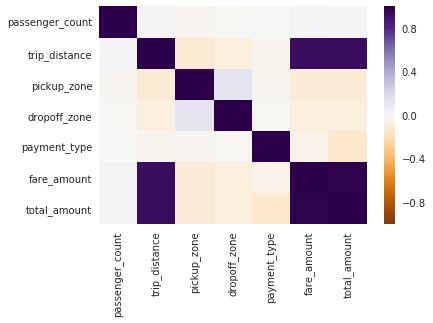

In [63]:
# plotting correlations
figure = (12,12)
ax = sns.heatmap(jan_cabs_trimmed2.corr(), cmap='PuOr')
#ax.title('Correlations between NYC Taxi Variables')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


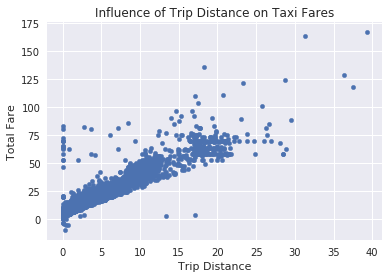

In [59]:
figure = jan_cabs_trimmed2.plot(x='trip_distance', y='total_amount', kind='scatter')
pl.xlabel("Trip Distance")
pl.ylabel("Total Fare")
pl.title("Influence of Trip Distance on Taxi Fares")
pl.legend()

**Figure 1:** Total Fare vs. Trip Distance. As you might expect, there is a strong positive relationship between trip distance and total fare - the longer the trip, the higher the price. 